In [0]:
import urllib.request
with urllib.request.urlopen("http://deeplearning.net/tutorial/code/utils.py") as url:
    response = url.read()
target = open('utils.py', 'w')
target.write(response.decode('utf-8'))
target.close()

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
!pip install pillow
from PIL import Image
from utils import tile_raster_images
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
v_bias = tf.placeholder("float", [7])
h_bias = tf.placeholder("float", [2])

In [0]:
W = tf.constant(np.random.normal(loc=0.0, scale=1.0, size=(7,2)).astype(np.float32))

In [0]:
sess = tf.Session()
X = tf.constant([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]])
v_state = X
print ("Input: ", sess.run(v_state))

h_bias = tf.constant([0.1, 0.1])
print ("hb: ", sess.run(h_bias))
print ("w: ", sess.run(W))

# Calculate the probabilities of turning the hidden units on:
h_prob = tf.nn.sigmoid(tf.matmul(v_state, W) + h_bias)  #probabilities of the hidden units
print ("p(h|v): ", sess.run(h_prob))

# Draw samples from the distribution:
h_state = tf.nn.relu(tf.sign(h_prob - tf.random_uniform(tf.shape(h_prob)))) #states
print ("h0 states:", sess.run(h_state))

Input:  [[1. 0. 0. 1. 0. 0. 0.]]
hb:  [0.1 0.1]
w:  [[ 1.1731209   0.2110197 ]
 [ 0.68935364 -0.549787  ]
 [-0.35031772  1.3139763 ]
 [-0.07245265  0.20789896]
 [ 0.7135519   1.1430125 ]
 [ 1.1132443   0.6551356 ]
 [ 0.6196294   0.13439214]]
p(h|v):  [[0.7686437  0.62689483]]
h0 states: [[1. 1.]]


In [0]:
vb = tf.constant([[0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1]])
print("b: ", sess.run(vb))
v_prob = sess.run(tf.nn.sigmoid(tf.matmul(h_state, tf.transpose(W)) + vb))
print("p(vi|h): ", v_prob)

v_state = tf.nn.relu(tf.sign(v_prob - tf.random_uniform(tf.shape(v_prob))))
print("v probability states: ", sess.run(v_state))


b:  [[0.1 0.2 0.1 0.1 0.1 0.2 0.1]]
p(vi|h):  [[0.7812765  0.70875674 0.4377453  0.5068864  0.69286585 0.78805554
  0.6725254 ]]
v probability states:  [[0. 0. 0. 1. 1. 1. 0.]]


In [0]:
inp = sess.run(X)
print(inp)
print(v_prob[0])
v_probability = 1
for elm, p in zip(inp[0],v_prob[0]) :
    if elm ==1:
        v_probability *= p
    else:
        v_probability *= (1-p)
v_probability

[[1. 0. 0. 1. 0. 0. 0.]]
[0.7812765  0.70875674 0.4377453  0.5068864  0.69286585 0.78805554
 0.6725254 ]


0.0013823951301751595

In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
trX[1].shape

(784,)

In [0]:
vb = tf.placeholder("float", [784])
hb = tf.placeholder("float", [50])

In [0]:
W = tf.placeholder("float", [784,50])

In [0]:
v0_state = tf.placeholder("float", [None, 784])

In [0]:
h0_prob = tf.nn.sigmoid(tf.matmul(v0_state, W) + hb)
h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random_uniform(tf.shape(h0_prob))))

In [0]:
v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W) + vb))
v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random_uniform(tf.shape(v1_prob))))

In [0]:
err = tf.reduce_mean(tf.square(v0_state - v1_state))

In [0]:
h1_prob = tf.nn.sigmoid(tf.matmul(v1_state, W) + hb)
h1_state = tf.nn.relu(tf.sign(h1_prob - tf.random_uniform(tf.shape(h1_prob))))

In [0]:
alpha = 0.01
W_delta = tf.matmul(tf.transpose(v0_state), h0_prob) - tf.matmul(tf.transpose(v1_state), h1_prob)
update_w = W + alpha * W_delta
update_vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
update_hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0)

In [0]:
cur_w = np.zeros([784,50], np.float32)
cur_vb = np.zeros([784], np.float32)
cur_hb = np.zeros([50], np.float32)
prv_w = np.zeros([784,50], np.float32)
prv_vb = np.zeros([784], np.float32)
prv_hb = np.zeros([50], np.float32)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)


In [0]:
sess.run(err, feed_dict={v0_state: trX, W: prv_w, vb: prv_vb, hb: prv_hb})

0.4815242

Epoch: 0 reconstruction error: 0.080732
Epoch: 1 reconstruction error: 0.075410
Epoch: 2 reconstruction error: 0.073795
Epoch: 3 reconstruction error: 0.073153
Epoch: 4 reconstruction error: 0.073085


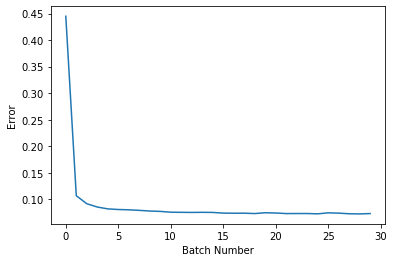

In [0]:
epochs = 5
batchsize = 100
weights = []
errors=[]

for epoch in range(epochs):
    for start, end in zip(range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict = {v0_state: batch, W: prv_w, vb:prv_vb, hb:prv_hb})
        cur_vb = sess.run(update_vb, feed_dict = {v0_state: batch, W: prv_w, vb:prv_vb, hb:prv_hb})
        cur_hb= sess.run(update_hb, feed_dict = {v0_state: batch, W: prv_w, vb:prv_vb, hb:prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
        if start % 10000 == 0:
            errors.append(sess.run(err, feed_dict={v0_state: trX, W: cur_w, vb:cur_vb, hb:cur_hb}))
            weights.append(cur_w)
    print('Epoch: %d' % epoch, 'reconstruction error: %f' % errors[-1])
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()

In [0]:
uw = weights[-1].T
print(uw)

[[-0.68332666 -0.7206548  -0.7518775  ... -0.64952064 -0.7243819
  -0.7707785 ]
 [-0.33242825 -0.31292123 -0.304774   ... -0.35341    -0.3279604
  -0.30705985]
 [-0.5587517  -0.5949632  -0.5632768  ... -0.61499953 -0.5662804
  -0.615654  ]
 ...
 [-0.7882571  -0.8123583  -0.7797304  ... -0.7442158  -0.70997113
  -0.79847807]
 [-1.4147792  -1.5080903  -1.3221161  ... -1.444682   -1.3131087
  -1.5271131 ]
 [-0.2924242  -0.26404652 -0.32427785 ... -0.28517905 -0.2779591
  -0.2423151 ]]


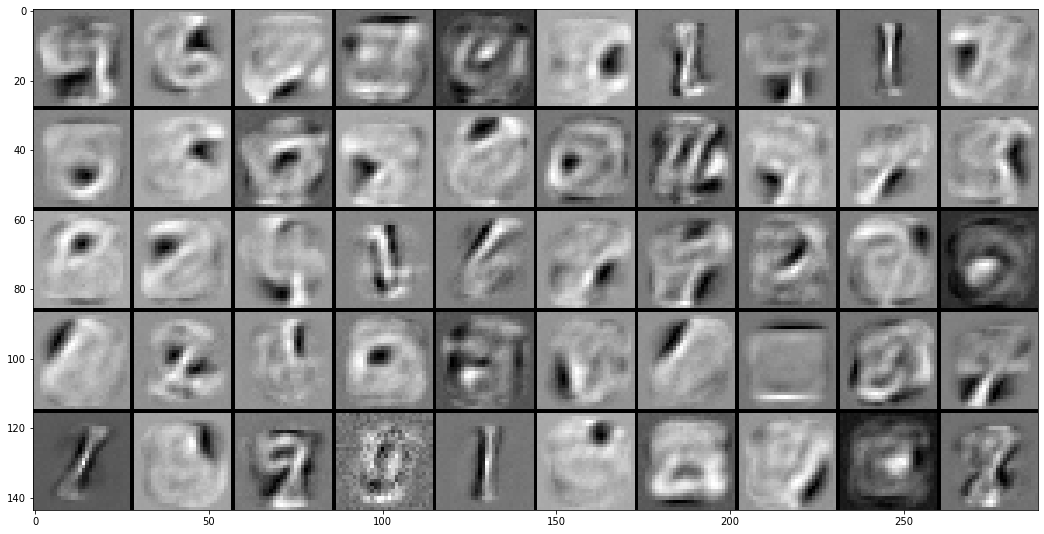

In [0]:
tile_raster_images(X=cur_w.T, img_shape=(28, 28), tile_shape=(5, 10), tile_spacing=(1, 1))
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(X=cur_w.T, img_shape=(28, 28) ,tile_shape=(5, 10), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

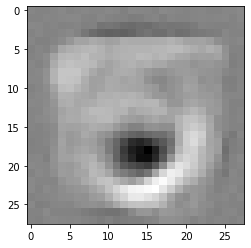

In [0]:

from PIL import Image
image = Image.fromarray(tile_raster_images(X=cur_w.T[10:11], img_shape=(28,28), tile_shape=(1,1), tile_spacing=(1,1)))
plt.rcParams['figure.figsize']=(4.0, 4.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

--2020-04-16 08:56:18--  https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.box.com (ibm.box.com)... 107.152.26.197, 107.152.27.197
Connecting to ibm.box.com (ibm.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg [following]
--2020-04-16 08:56:18--  https://ibm.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg [following]
--2020-04-16 08:56:18--  https://ibm.ent.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.ent.box.com (ibm.ent.box.com)... 107.152.26.211, 107.152.27.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|107.152.26.211|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: h

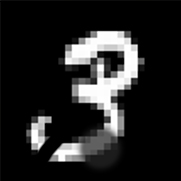

In [0]:
!wget -O destructed3.jpg  https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
img = Image.open('destructed3.jpg')
img

In [0]:
sample_case = np.array(img.convert('I').resize((28,28))).ravel().reshape((1, -1))/255.0

In [0]:
hh0_p = tf.nn.sigmoid(tf.matmul(v0_state, W) + hb)

hh0_s = tf.round(hh0_p)
hh0_p_val, hh0_s_val = sess.run((hh0_p, hh0_s), feed_dict={ v0_state: sample_case, W: prv_w, hb: prv_hb})
print("Probability nodes in hidden layer: ", hh0_p_val)
print("Activated nodes in hidden layer: ", hh0_s_val)


vv1_p = tf.nn.sigmoid(tf.matmul(hh0_s_val, tf.transpose(W)) + vb)
rec_prob = sess.run(vv1_p, feed_dict={ hh0_s: hh0_s_val, W: prv_w, vb: prv_vb})

Probability nodes in hidden layer:  [[1.66295140e-31 1.15814934e-31 3.40608240e-04 1.00000000e+00
  4.52700490e-03 2.11938079e-02 2.70379021e-17 1.44482991e-24
  1.95525587e-22 9.99999046e-01 1.79919288e-10 2.01107753e-20
  4.23661540e-13 2.50848252e-02 1.84308853e-11 9.99999881e-01
  4.51996190e-10 4.65561707e-15 2.19364311e-24 3.03935353e-03
  5.08694882e-07 8.87814701e-01 2.01603903e-28 1.76909225e-12
  2.01942893e-10 2.13743512e-09 1.14595179e-20 2.23230774e-11
  2.15868113e-06 5.32754362e-01 1.00000000e+00 1.07102431e-04
  4.65652378e-11 2.56896741e-03 1.29231578e-03 1.72827112e-14
  4.20881575e-03 1.00000000e+00 9.99999046e-01 1.22297423e-16
  4.42462218e-18 2.71840211e-18 5.64296309e-12 1.42622442e-10
  1.13138075e-17 1.24865763e-22 9.28437173e-01 9.98151481e-01
  1.00000000e+00 5.10431697e-08]]
Activated nodes in hidden layer:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  1.

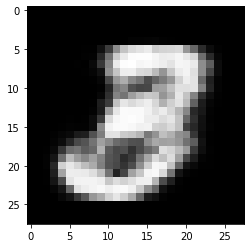

In [0]:
img = Image.fromarray(tile_raster_images(X=rec_prob, img_shape=(28, 28), tile_shape = (1,1), tile_spacing=(1,1)))
plt.rcParams['figure.figsize']=(4.0, 4.0)
imgplot=plt.imshow(img)
imgplot.set_cmap('gray')